# Parametric Tutorial
**NOTE** 
This notebook is not meant to teach statistics, but only demo how to run the py50 functions. There are plenty of resources available online. I particularly found introductory [tutorials by DATAtab](https://datatab.net/tutorial/get-started) helpful. 

The following page will show examples of parametric tests using the Stats() and Plots() modules of py50. There are many plot features available for py50, but they will not all be demoed here. Instead, to see all the plots available, take a look at the [006_statistics_quickstart tutorial](https://github.com/tlint101/py50/blob/main/tutorials/006_statistics_quickstart.ipynb). 

In [1]:
import pandas as pd
from py50 import utils
from py50.stats import Stats, Plots
from matplotlib import pyplot as plt
import pingouin as pg

# Initialize class
stats = Stats()
plot = Plots()

In [2]:
# Remove this from tutorial when finished
pg.list_dataset()

,description,useful,ref
dataset,,,
ancova,Teaching method with family income as covariate,ANCOVA,www.real-statistics.com
anova,Pain threshold per hair color,anova - pairwise_tukey,McClave and Dietrich 1991
anova2,Fertilizer impact on the yield of crops,anova,www.real-statistics.com
anova2_unbalanced,Diet and exercise impact,anova,http://onlinestatbook.com/2/analysis_of_varian...
anova3,Cholesterol in different groups,anova,Pingouin
anova3_unbalanced,Cholesterol in different groups,anova,Pingouin
blandaltman,Hypothetical data of an agreement between two ...,plot_blandaltman,https://www.biochemia-medica.com/en/journal/25...
chi2_independence,Patients' attributes and heart conditions,chi2_independence,https://archive.ics.uci.edu/ml/datasets/Heart+...
chi2_mcnemar,Responses to 2 athlete's foot treatments,chi2_mcnemar,http://www.stat.purdue.edu/~tqin/system101/me...


In [3]:
## List Datasets available from Pingouin
# pg.list_dataset()

# Read Dataset
df = pg.read_dataset('penguins')
data = df
print('List of Group names in Dataset:', data['species'].unique())
data

List of Group names in Dataset: ['Adelie' 'Chinstrap' 'Gentoo']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


## Visualize Dataset

In [4]:
# Test for normality
stats.get_normality(data, value_col='body_mass_g', group_col='species').round(3)

,W,pval,normal
species,,,
Adelie,0.981,0.032,False
Chinstrap,0.984,0.561,True
Gentoo,0.986,0.234,True


In [5]:
stats.get_homoscedasticity(data, value_col='body_mass_g', group_col='species').round(3)

,W,pval,equal_var
levene,NaN,NaN,False


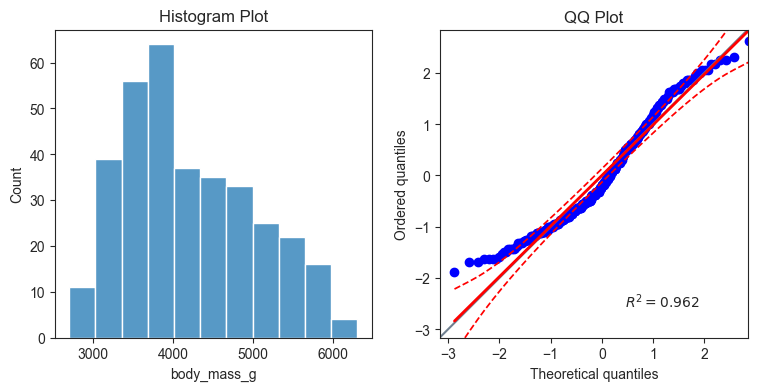

In [6]:
# create subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
plot.distribution(data, val_col='body_mass_g', type='histplot', ax=ax1)
plot.distribution(data, val_col='body_mass_g', type='qqplot', ax=ax2)

# Adding titles to subplots
ax1.set_title('Histogram Plot')
ax2.set_title('QQ Plot')

plt.show()

# Tukey

In [7]:
tukey = stats.get_tukey(data, value_col='body_mass_g', group_col='species').round(4)
tukey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,significance
0,Adelie,Chinstrap,3700.6623,3733.0882,-32.426,67.5117,-0.4803,0.8807,-0.0739,n.s.
1,Adelie,Gentoo,3700.6623,5076.0163,-1375.354,56.1480,-24.4952,0.0000,-2.8602,****
2,Chinstrap,Gentoo,3733.0882,5076.0163,-1342.928,69.8569,-19.2240,0.0000,-2.8753,****


In [8]:
# welch = stats.get_welch_anova(data, value_col='body_mass_g', group_col='species').round(4)
welch = stats.get_welch_anova(data, value_col='body_mass_g', group_col='species')
welch

,Source,ddof1,ddof2,F,p-unc,np2,significance
0,species,2,189.478413,317.572267,3.093701e-61,0.669672,****


Perform test for gameshowell

if i cannot change the plot order, add the pair_df code from tukey into gameshowell. Perhaps add it for other post-hoc tests?

In [9]:
gameshowell = stats.get_gameshowell(data, value_col='body_mass_g', group_col='species')
gameshowell

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,significance
0,Adelie,Chinstrap,3700.662252,3733.088235,-32.425984,59.706437,-0.543090,152.454796,0.850154,-0.073946,n.s.
1,Adelie,Gentoo,3700.662252,5076.016260,-1375.354009,58.810929,-23.386028,249.642554,0.000000,-2.860201,****
2,Chinstrap,Gentoo,3733.088235,5076.016260,-1342.928025,65.102843,-20.627794,170.404362,0.000000,-2.875327,****


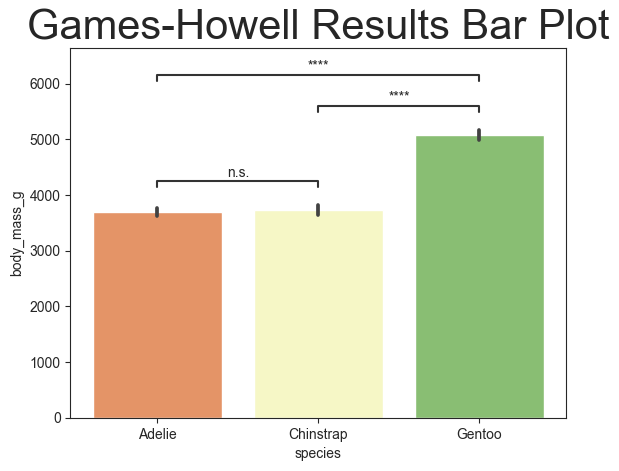

In [10]:
plot.bar_plot(data=data, test='gameshowell', value_col='body_mass_g', group_col='species', title='Games-Howell Results Bar Plot', title_fontsize=30, palette='RdYlGn')

Repeated Measures

In [11]:
data = pg.read_dataset('rm_anova')
data.head()

,Subject,Gender,Region,Education,DesireToKill,Disgustingness,Frighteningness
0,1,Female,North,some,10.0,High,High
1,1,Female,North,some,9.0,High,Low
2,1,Female,North,some,6.0,Low,High
3,1,Female,North,some,6.0,Low,Low
4,2,Female,North,advance,10.0,High,High


In [12]:
repeated_measures = stats.get_rm_anova(data, value_col='DesireToKill', group_col='Disgustingness', subgroup_col='Subject')
repeated_measures

,Source,ddof1,ddof2,F,p-unc,ng2,eps,significance
0,Disgustingness,1,92,12.043878,0.000793,0.025784,1.0,***


In [ ]:
df = pg.read_dataset('rm_anova')
aov = pg.rm_anova(dv='DesireToKill', within='Disgustingness',
                  subject='Subject', data=df, detailed=True, effsize="np2")
aov.round(3)

# Mixed ANOVA

In [ ]:
mixed = stats.get_mixed_anova()